In [140]:
import pandas as pd  # Manipulación y análisis de datos tabulares (filas y columnas).
import numpy as np  # Operaciones numéricas y matriciales.
import seaborn as sns  # Visualización estadística de datos.
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones.

# Matplotlib es una herramienta versátil para crear gráficos desde cero,
# mientras que Seaborn simplifica la creación de gráficos estadísticos.

from sklearn.decomposition import PCA  # Implementación del Análisis de Componentes Principales (PCA).
from sklearn.preprocessing import StandardScaler  # Estandarización de datos para análisis estadísticos.


In [141]:
# Cargar el dataset
df = sns.load_dataset("penguins")

# Mostrar las primeras filas
print(df.head())

df = df.drop(columns=["species", "island", "sex"])
df = df.dropna(axis=0)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


## 4. Determina el Número de Grupos.
Aplica el agrupamiento jerárquico al conjunto de datos y utiliza un dendrograma para sugerir un número razonable de grupos. Justifica tu elección del número de grupos. Realiza estos pasos tal y como has visto en clase y figura en los apuntes del tema.

Primero empezaremos estandarizando los datos, para que las magnitudes de estos no opaquen los cálculos de la distancia entre los registros, además que es un paso imprescindible a la hora de hacer clustering.


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_std.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


Siguiente paso vamos a realizar el calculo de las distancias de similitud (o diferencia entre estos registros). Usaremos la distancia euclidea para ver esta similitud, puesto que esta implementado de forma sencilla en python

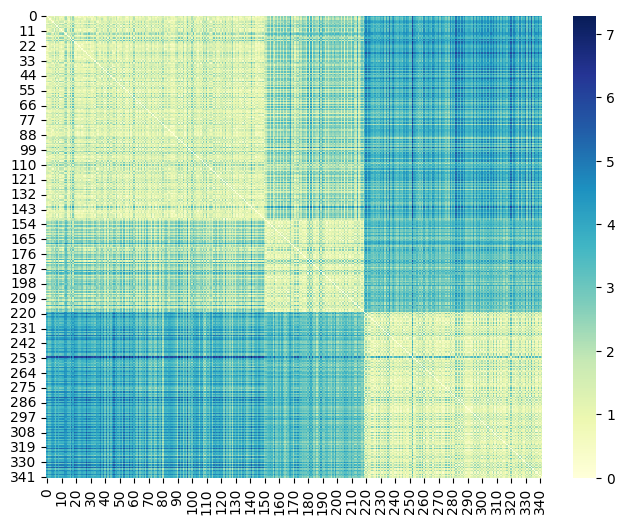

In [143]:
from scipy.spatial import distance

# Calculate the pairwise Euclidean distances
distance_matrix = pd.DataFrame(distance.cdist(df_std, df_std, 'euclidean'))

plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()

Ya a partir de este gráfico empezamos a identificar los 3 posibles grupos en los cuadrados más claros (que indican cercanía entre esos registros) y lo externo a estos cuadrados claros, las bandas oscuras, nos indican la lejanía con otros grupos o clusters.

Generamos el dendrograma usando las distancias de Ward:

In [144]:
from scipy.cluster.hierarchy import ward

distance_matrix = ward(df_std)
distance_matrix_df = pd.DataFrame(distance_matrix)

distance_matrix_df.head()

,0,1,2,3
0,225.0,311.0,0.108991,2.0
1,260.0,312.0,0.108991,2.0
2,35.0,106.0,0.126537,2.0
3,266.0,302.0,0.131843,2.0
4,75.0,142.0,0.132965,2.0


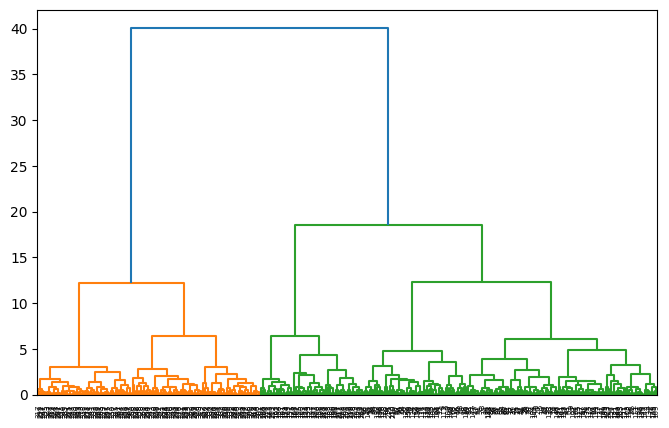

In [145]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(8, 5))
dendrogram(distance_matrix)
plt.show()

En esta gráfica, por colores divide nuestros pingüinos en dos clusters, pero realmente es posible ver que el árbol de en medio verde tiene bastante lejanía con la otra rama de este nodo. Por ello seccionaremos este árbol a la altura del 15 más o menos. Dandonos pues, 3 clusters. 

In [146]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3
cluster_assignments = fcluster(distance_matrix, num_clusters, criterion='maxclust')

df['Cluster4'] = cluster_assignments
print("Cluster Assignments:", cluster_assignments)

Cluster Assignments: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 3 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 2 3 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


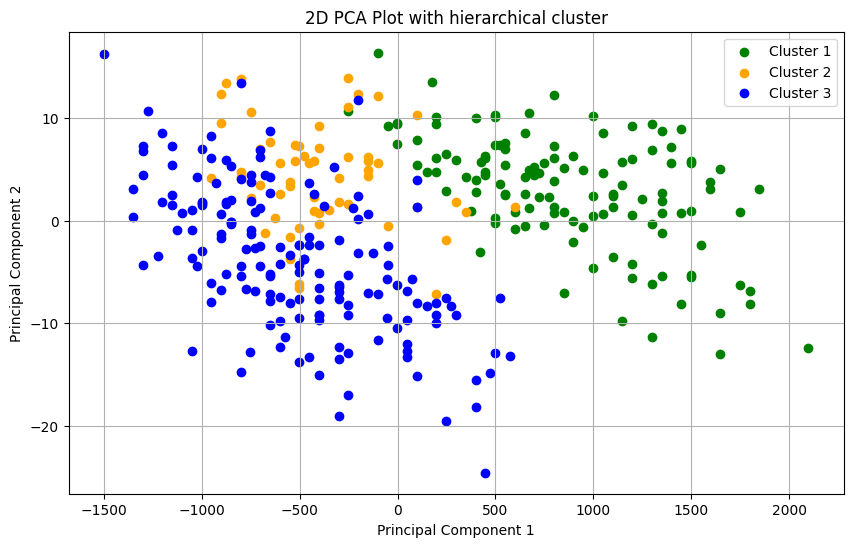

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Create a new DataFrame for the 2D principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

colors = ["green", "orange", "blue"]
i=0
for cluster in np.unique(cluster_assignments):
    plt.scatter(df_pca.loc[cluster_assignments == cluster, 'PC1'],
                df_pca.loc[cluster_assignments == cluster, 'PC2'],
                color=colors[i],
                label=f'Cluster {cluster}')
    i+=1

plt.title("2D PCA Plot with hierarchical cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


En este resultado final, donde proyectamos según componentes principales, podemos observar que más o menos se ha realizado un agrupamiento decente, donde tal vez se pueda ver que se solapan unos cuantos registros en los clusters 2 y 3, pero también hay que tener en cuenta que solo estamos visulizando 2 de 4 posibles dimensiones.

## 5. Agrupamiento K-Means.
Implementa el algoritmo de agrupamiento k-means en el conjunto de datos. Experimenta con diferentes valores de k y utiliza métricas apropiadas (por ejemplo, método del codo) para determinar el número óptimo de grupos. 

Primero probaremos con el metodo del codo para visulaizar el número de K que deberíamos usar. 

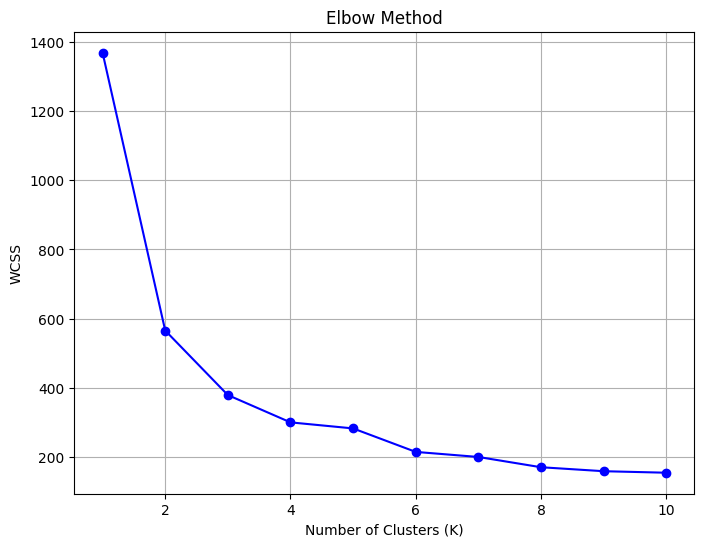

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create an array to store the WCSS values for different values of K:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Según la tabla anterior podemos ver que es a partir del tercer o el cuarto K donde la inclinación de la curva se estabiliza. Viendo, todo lo que hemos hecho hasta ahora vamos a usar K=3 para comprobar si nuestros calculos anteriores son correctos.

In [149]:
from sklearn.cluster import KMeans

# Set the number of clusters (k=4)
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the KMeans model to your standardized data
kmeans.fit(df_std)

# Get the cluster labels for your data
kmeans_cluster_labels = kmeans.labels_
kmeans_cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

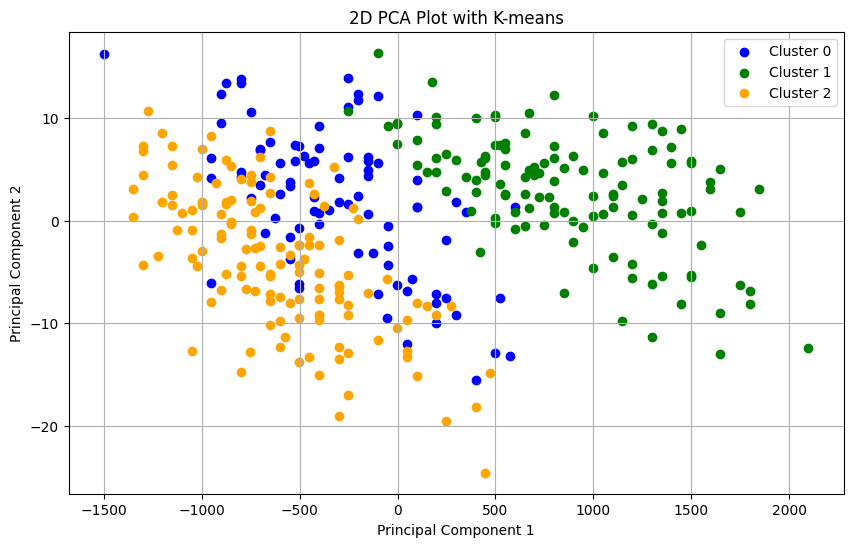

In [150]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Create a new DataFrame for the 2D principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

colors = ["blue", "green", "orange"]
i=0
for cluster in np.unique(kmeans_cluster_labels):
    plt.scatter(df_pca.loc[kmeans_cluster_labels == cluster, 'PC1'],
                df_pca.loc[kmeans_cluster_labels == cluster, 'PC2'],
                color=colors[i],
                label=f'Cluster {cluster}')
    i+=1

plt.title("2D PCA Plot with K-means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

Igual que en el caso del agrupamiento jerarquico, realiza un clustering bastante aceptable, mirandolo desde 2D. 

## 6. Validación del Agrupamiento.
Aplica métricas de validación del agrupamiento (por ejemplo, puntuación de silueta) para evaluar la calidad de los resultados del agrupamiento. Discute la efectividad del algoritmo de agrupamiento en capturar la estructura inherente de los datos tal y como se ha visto en clase.

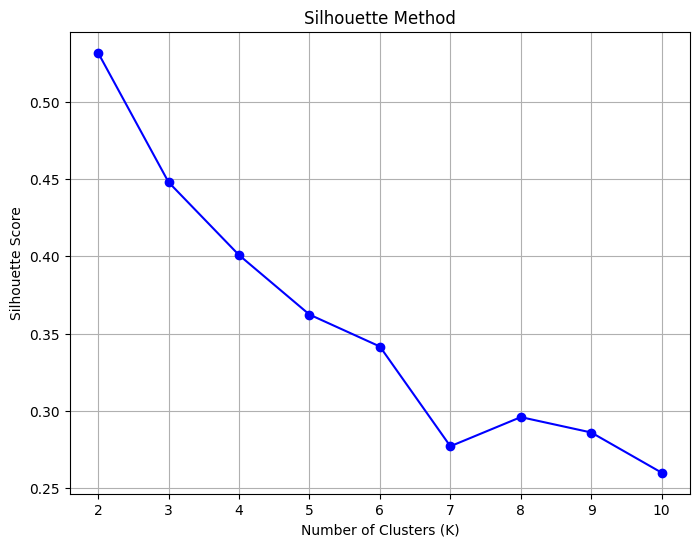

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an array to store silhouette scores for different values of K
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_std, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


En esta gráfica de silueta la mejor solución posible es coger 2 grupos, ya que es el valor más alto, aunque tal vez al escoger solo 2 clusters se nos quede un agrupamiento demasiado grande, por ello hemos decidio usar el siguiente valor más alto: 3

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22088\3899455587.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / k)


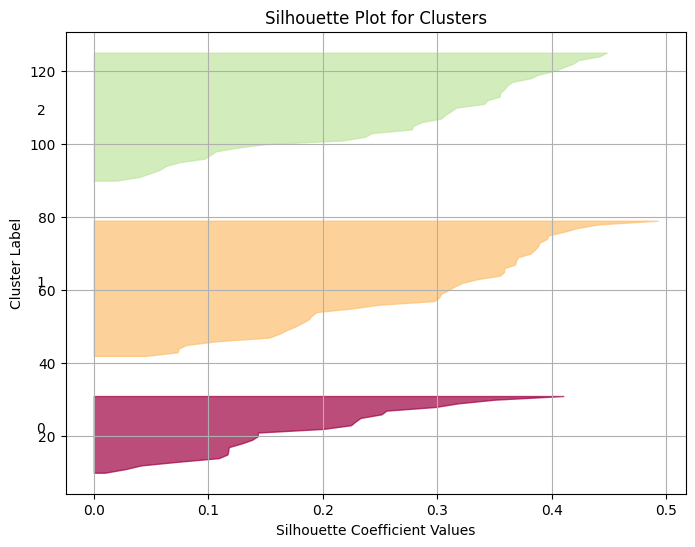

In [152]:
from sklearn.metrics import silhouette_samples

# Calculates silhouette scores for each cluster
silhouette_values = silhouette_samples(df_std, labels)

plt.figure(figsize=(8, 6))
y_lower = 10
k = 3
for i in range(k):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap("Spectral")(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()


Tal y como se observa en las puntuaciones de silueta para cada observación, donde mejor está definido el grupo es para el cluster verde claro que tiendo a pensar que es el cluster 2(verde oscuro en la grafica de ACP) puesto que es el mejor agrupado. Lo deduzco por los siuientes puntos:
* No es el grupo con mas registros.
* Tiene bastantes registros con valores altos
* En la grafica de ACP se pueden observar varios registros bastantes alejados

Luego el naranja claro será el cluster 0 (naranja), mi pensamiento se basa en el razonamiento anterior, ya que ambas muestras son bastante parecidas.
Finalmente el cluster granate será el cluster 1, ya que es el más disperso sin duda.

Todo este razonamiento lo podría haber hecho usando los DF, pero ¿Que gracia tendría hacerlo de esa forma? Creo que es más interesante entender las gráficas sin tener la chuletilla de los datos.

## 7. Jerárquico versus K-Means.
Compara y contrasta los resultados obtenidos del agrupamiento jerárquico y el agrupamiento k-means. Discute similitudes o diferencias en las asignaciones de los grupos.

## 8. Proporciona una interpretación de los grupos. 
¿Qué representan los grupos identificados en el contexto de las especies de pingüinos? ¿Existen patrones o tendencias significativas?

Como he estado destacando en los puntos anteriores, y como se puede observar en varias gráficas: Los grupos representados son las especies de los pingüinos de los que tenemos registros (o tal vez la isla de procedencia de estos animales, ya que en cada isla suele predominar una especie). 

En relación a las variables podemos afirmar que: 
* Gentoo: Mayor tamaño, pico largo y plano, aletas largas, mayor masa corporal.
* Chinstrap: Pico más delgado, tamaño intermedio.
* Adelie: Pico corto y profundo, aletas más cortas, menor masa corporal.

## 9. Resume tus hallazgos y concluye el análisis. Discute limitaciones o desafíos encontrados durante el proceso de agrupamiento.